#第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい

##準備

In [1]:
!pwd
%cd /content/drive/My Drive/Colab Notebooks/NLP/

/content
/content/drive/My Drive/Colab Notebooks/NLP


データをダウンロードします。

In [2]:
!wget https://nlp100.github.io/data/neko.txt

--2021-10-03 06:59:11--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.111.153, 185.199.108.153, 185.199.109.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt.1’

neko.txt.1          100%[===================>] 952.92K  --.-KB/s    in 0.05s   

2021-10-03 06:59:11 (18.0 MB/s) - ‘neko.txt.1’ saved [975789/975789]



形態素解析エンジンMecabをVMにInstallします。

In [2]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-jumandic-utf8 all 7.0-20130310-4 [16.2 MB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd6

コマンドラインで、形態素解析します。

In [5]:
!mecab -o ./neko.txt.mecab ./neko.txt

中身を確認

In [3]:
!head -n 50 ./neko.txt.mecab 

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
とんと	副詞,一般,*,*,*,*,とんと,トント,トント
見当	名詞,サ変接続,*,*,*,*,見当,ケントウ,ケントー
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
つか	動詞,自立,*,*,五段・カ行イ音便,未然形,つく,ツカ,ツカ
ぬ	助動詞,*,*,*,特殊・ヌ,基本形,ぬ,ヌ,ヌ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
何	名詞,代名詞,一般,*,*,*,何,ナニ,ナニ
でも	助詞,副助詞,*,*,*,*,でも,デモ,デモ
薄暗い	形容詞,自立,*,*,形容詞・アウオ段,基本形,薄暗い,ウスグライ,ウスグライ
じめじめ	副詞,一般,*,*,*,*,じめじめ,ジメジメ,ジメジメ
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
所	名詞,非自

###MeCabを動かしてみる

Pythonの中でMecabを使えるようにします。unidic-liteという一番コンパクトな辞書をinstallしておきます。

In [4]:
!pip install mecab-python3
!pip install unidic-lite

     |████████████████████████████████| 488 kB 8.5 MB/s 
     |████████████████████████████████| 47.4 MB 46 kB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658836 sha256=ed6a25439a0174b75ee50542e719a1d38e9d6b047bc2ffb9961ee848608b4fec
  Stored in directory: /root/.cache/pip/wheels/de/69/b1/112140b599f2b13f609d485a99e357ba68df194d2079c5b1a2
Successfully built unidic-lite


MecabのAPIは、デフォルトで付加情報を出します。-O wakatiとすると、語分ちだけを返します。
実行してみましょう。

In [5]:
import MeCab
tagger = MeCab.Tagger("-Owakati") 
print('分かち:',tagger.parse('吾輩は猫である。'))
tagger = MeCab.Tagger() 
print('解析:\n',tagger.parse('吾輩は猫である。'))

分かち: 吾輩 は 猫 で ある 。 

解析:
 吾輩	ワガハイ	ワガハイ	我が輩	代名詞			0
は	ワ	ハ	は	助詞-係助詞			
猫	ネコ	ネコ	猫	名詞-普通名詞-一般			1
で	デ	ダ	だ	助動詞	助動詞-ダ	連用形-一般	
ある	アル	アル	有る	動詞-非自立可能	五段-ラ行	終止形-一般	1
。			。	補助記号-句点			
EOS



##課題30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．



###ヒント

マッピング型とは、辞書型のこと。
https://note.nkmk.me/python-dict-create/　

surfaceというのは、活用語の場合、単語の活用形で、baseは、終止形。

形態素解析した結果は、以下のようなフォーマットをしている。表層形の後ろはtab。


```
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
```
文の切れ目は、EOS (EndOdSentence)のみ含む行。

期待する出力は、ある1文だけで、以下のようなもの
```
{‘surface’:’xxx’, ‘base’:‘yyy’, ‘pos’:‘zzz’, ‘pos1’:‘aaa’}
{‘surface’:…. … }
…
```


###解答例

In [6]:
sentences = []
morphs = []
with open( './neko.txt.mecab', mode='r') as f:
  for line in f:  
    if line == 'EOS\n':
      sentences.append(morphs) #morphsを1文分として保存
      morphs = []
      continue
    elif len(line)<2: continue
    else:
      fields = line.split('\t')
      attr =  fields[1].split(',')
      morph = {'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
      morphs.append(morph)
for morph in sentences[2]:
  print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}
{'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'}


##課題31. 動詞
動詞の表層形をすべて抽出せよ．



###ヒント

辞書型の値の取り出しは、辞書[‘キー‘]。

morph[‘pos’]とかで辞書型から値を取り出す


###解答例

In [ ]:
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      print(morph['surface'])

##課題32. 動詞の原形
動詞の原形をすべて抽出せよ

###解答例

In [ ]:
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      print(morph['base'])

##課題33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ.



###ヒント

3単語ずつ舐めて行って、品詞と表層系を条件チェックしていけばよい。
文末にEOSがあるので、「名詞＋の＋名詞」を1文内部で探してよい。

###解答例

In [ ]:
for sentence in sentences:
  for i in range(1, len(sentence) - 2):
    if sentence[i - 1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i + 1]['pos'] == '名詞':
      print(sentence[i - 1]['surface'] + sentence[i]['surface'] + sentence[i + 1]['surface'])

##課題34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．


###ヒント

名詞の連続の最長一致は、何個でも続く可能性がある。
直前に見たの名詞だっけよな、なら続いている、と履歴を意識する。
名詞連続の切れ目（名詞以外が来た時）で、これまで名詞連続を認識していたら、吐き出す。

###解答例

In [8]:
for sentence in sentences:
  np = []
  for i in range(len(sentence) - 1):
    if sentence[i]['pos'] == '名詞':
      if np==[] or (len(np)>0 and sentence[i-1]['pos']=='名詞'):
        np.append(sentence[i]['surface'])
    else:
      if len(np)>1: print(','.join(np))
      np = []


ストリーミング出力は最後の 5000 行に切り捨てられました。
一,枚
迷亭,君,自身
時,君
一,点
何,人
一,歩
美学,原論
西洋,料理
迷亭,君,一流
鈴木,君
気の毒,様
一大,珍,報
珍,報
齎,ら
珍,報
珍,報
正札,付,一,厘
珍,報
君,寒月
博士,論文
博士,論文
是非,通知
団栗,博士
鈴木,君
さっき,鈴木,君
先日,喧嘩
博士,論文
迷亭,先生,自賛
珍,報
珍,報
珍,報
損,い
仏師,屋
一,日
鈴木,君
ぐる,男
鈴木,君
その後,鼻
頃,トリストラム・シャンデー
鼻,論
鼻,名
果,つる
不憫,千,万
今度,ここ
美学,上
喋,舌
鈴木,君
鈴木,君
顔,付
鼻,恋
鼻,恋
実業,家
一,人
金田,某
秀才,水島,寒月
我々,朋友,たる,者
実業,家
十,年,前
鈴木,君
胡麻,化,そう
希,臘人
百方,奨励
鈴木,君
三,日,前
美学,研究
一,度
漆,桶
歓天,喜,地
鈴木,君
顔,付
菓子,皿
吾,人
希,臘
逍遥,派
元祖,アリストートル
曰く,さ,——,おい,菓子,皿
——,彼等,希,臘人
何,物
智識,以上
智識,以上
黄白,青,銭
十分,理解
時事,問題
金田,某
何,だい,紙幣
眼,鼻
一,個
活動,紙幣
活動,紙幣
活動,切手
寒月,君
学問,最高
一,位
長州,征伐,時代
日夜,団栗
吾妻,橋
発作,的,所為
問屋,たる
迷亭,一流
寒月,君
活動,図書館
二,十,八,珊
一,たび,時機
——,爆発
——」,迷亭
迷亭,一流
活動,切手
何,千,万,枚
沙弥,君
菓子,皿
鈴木,君
揚句,ここ
鈴木,君
利口,者
封建,時代
思い,通り
極楽,流
鈴木,君
卒業,後
極楽,主義
極楽,主義
金,時計
極楽,主義
金田,夫婦
極楽,主義
沙弥,君
当該,事件
人間,以外
心理,作用
極楽,主義
極楽,主義
鈴木,藤十郎,君
極楽,主義
鈴木,藤十郎,君
言葉,寡,なに,上品
実業,家,贔負
沙弥,君
君,大
愚図,愚図
古今,独歩
評論,家
巴里,大学
ため,外出
君,ゃ,大学
リー,ドル
リー,ドル
空気,銃
鈴木,君
鈴木,君
金田,事件
一息,つき
十,年,振り
君,等
我々,仲間
書生,時代
一番,遠慮
迷亭,君
鈴木,君
演芸,矯風,会
二,十,四,時間
二,十,四,時間
写生,文
二六時中,精細
奇,

In [ ]:
# C-like codes
for s in sentences:
  i=0
  np = []
  while i<len(s):
    if s[i]['pos']=='名詞':
      np.append(s[i]['surface'])
      j = i+1
      while s[j]['pos']=='名詞' and j<len(s):
        np.append(s[j]['surface'])
        j += 1
      i = j
    else:
      if len(np)>1: print(','.join(np))
      np = []
      i += 1
      continue

##課題35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．




###ヒント
辞書型をsortするには、
元のリストを変更するか、新たに作るかで、sort/sortedがある。どっちでも。
https://note.nkmk.me/python-list-sort-sorted/

大小関係を比較するキーを指定するとよい。
https://note.nkmk.me/python-dict-list-sort/

Pythonのlambda式表現で、キー指定する。
https://note.nkmk.me/python-lambda-usage/

辞書のキーと値ペアの繰り返しデータの取り出しは、辞書.items()が使える。
https://note.nkmk.me/python-dict-keys-values-items/

存在しないキーを参照してもエラーが起きないdefaultdicだと、キーが既に存在するかどうかのチェックが省ける。
https://qiita.com/xza/items/72a1b07fcf64d1f4bdb7

まず、文章、形態素に対し、2重ループを回して、単語の表層形か基本形をキーにし、値が個数であるような辞書を作る。

lex={}
for sentence in sentences:
for morpho in sentence:
… lex[morph['surface']] += 1

次いで辞書の項目を頻度でソート

freq = sorted(lex.items(), key=lambda:x:…, reverse=True)

###解答例

In [9]:
#assume 30 
lex={}
for sentence in sentences:
  for morph in sentence:
      if morph['surface'] in lex:
        lex[morph['surface']] += 1
      else:
        lex[morph['surface']] = 1 
freq = sorted(lex.items(), key=lambda x: x[1], reverse=True)
for w in freq[:10]:
  print(w)

from collections import defaultdict 
lex = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    lex[morph['surface']] += 1
freq = sorted(lex.items(), key=lambda x: x[1], reverse=True)
for w in freq[:10]:
  print(w)

('', 9964)
('の', 9194)
('。', 7486)
('て', 6868)
('、', 6772)
('は', 6420)
('に', 6243)
('を', 6071)
('と', 5508)
('が', 5337)
('', 9964)
('の', 9194)
('。', 7486)
('て', 6868)
('、', 6772)
('は', 6420)
('に', 6243)
('を', 6071)
('と', 5508)
('が', 5337)


##課題36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

ヒント：

import pyplot as plt

キーリスト、頻度リストを取り出しておく

plt.plot(x軸はキーのリスト、y軸は頻度のリスト,  label=“頻度”)

plt.show()

###ヒント pyplot
https://qiita.com/kira4845/items/9d340d68a0336f954506　など

基本的な使い方

plt.plot(x軸値のリスト, y軸値のリスト,  label=“ラベル")

plt.legend() #ラベルの表示

plt.show() #グラフの描画

グラフの種類ごとに異なるメソッドがある。

.plot(x,y) 折れ線グラフ 

.bar(x,y) 棒グラフ

…

.hist(データ, bins=ビン数)

https://qiita.com/supersaiakujin/items/be4a78809e7278c065e6　

ビン数というのは、ある頻度範囲のデータをまとめて表示する場合の個数

.scatter(x軸の値のリスト、y軸の値のリスト)

plt.xscale(‘log’)などで、軸を対数スケールにできる


###解答例

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12390 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12395 missing from current font.
  font.set_

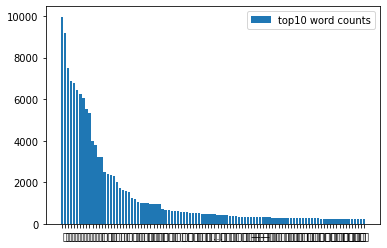

In [11]:
import matplotlib.pyplot as plt
keys = [f[0] for f in freq[:100]]
values = [f[1] for f in freq[:100]]
plt.bar(keys, values,  label="top100 word counts")
plt.legend()
plt.show()

##課題37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

ヒント：

共起語といった場合、通常、1文や１句内にともに出現する自立語（動詞、名詞、形容詞、副詞とか）ペアの事を言う。

猫を含む文章を見つけ、文内の単語をなめて、品詞を見て名詞とか動詞だけを拾い出して、35番のように出現回数を集計し、ソートする。
それをpyplotに流す



###解答例

('し', 83)
('事', 59)
('吾輩', 58)
('の', 55)
('いる', 46)
('ある', 42)
('人間', 40)
('この', 38)
('する', 38)
('もの', 36)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20107 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21566 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12356 missing from current font.
  font.set_

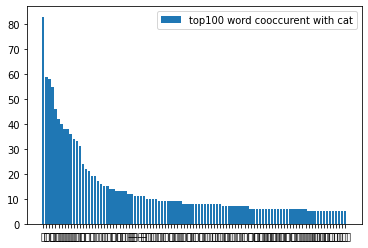

In [13]:
from collections import defaultdict 
cooc = defaultdict(int)
for sentence in sentences:
  if any([ m['surface']=='猫' for m in sentence]):
    for morph in sentence:
      if not(morph['pos']=='助詞' or morph['pos']=='助動詞' or morph['pos']=='記号'):
        if morph['surface']!='猫':
          cooc[morph['surface']] += 1
freq = sorted(cooc.items(), key=lambda x: x[1], reverse=True)
for w in freq[:10]:
  print(w)

import matplotlib.pyplot as plt
keys = [f[0] for f in freq[:100]]
values = [f[1] for f in freq[:100]]
plt.bar(keys, values,  label="top100 word cooccurent with cat")
plt.legend()
plt.show()

##課題38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である

ヒント：

辞書 .values()で、頻度の数字列が得られる。それをそのままplt.plot()に流せばよい。

###解答例

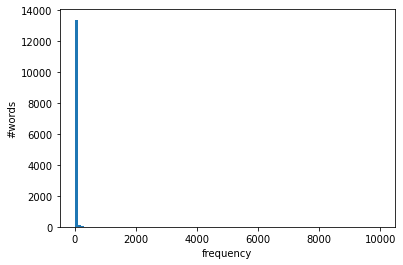

In [14]:
#Assume lex data of 35
data = lex.values() #辞書の中の頻度データを取り出す
plt.hist(data, bins=100) #100個棒を描く
plt.xlabel('frequency')
plt.ylabel('#words')
plt.show()

##課題39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

ヒント：

xのために、順位の数字のリストを生成する。
yは、頻度の数字列。

###解答例

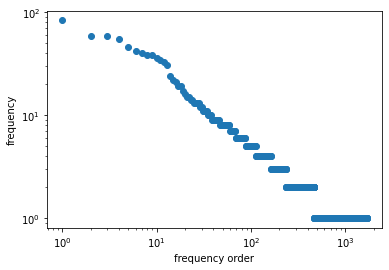

In [15]:
ranks = [r + 1 for r in range(len(freq))]
values = [a[1] for a in freq]
plt.scatter(ranks, values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('frequency order')
plt.ylabel('frequency')
plt.show()